Імпортуємо всі необхідні бібліотеки, датасет, з якого оберемо змінні attr_index_norm та rest_index_norm для класифікації, а також визначаємо кластери, аналогічно до попереднього домашнього завдання

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('airbnb_london_clean.csv')
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399


In [8]:
X = df.iloc[:, [14, 16]].values

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

df['Cluster'] = y_hc
cluster_counts = df['Cluster'].value_counts().sort_index()


cluster_counts = df['Cluster'].value_counts().sort_values(ascending=False)
largest_clusters = cluster_counts.index[:2]


X = df[df['Cluster'].isin(largest_clusters)].copy()
Y = X['Cluster']
X = X[['attr_index_norm', 'rest_index_norm']]

Розділимо нашу вибірку на тренувальну та тестову

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Розрахуємо оптимальну кількість k, щоб точність була не нижче 85%

In [11]:
best_k = None
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy >= 0.85:
        best_k = k
        break
print(f'Найбільш оптимальним варіантом є k={best_k}')

Найбільш оптимальним варіантом є k=1


Порахуємо точність для тестової вибірки

In [12]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Точність на тестовій виборці = {test_accuracy:.2f}")

Точність на тестовій виборці = 1.00


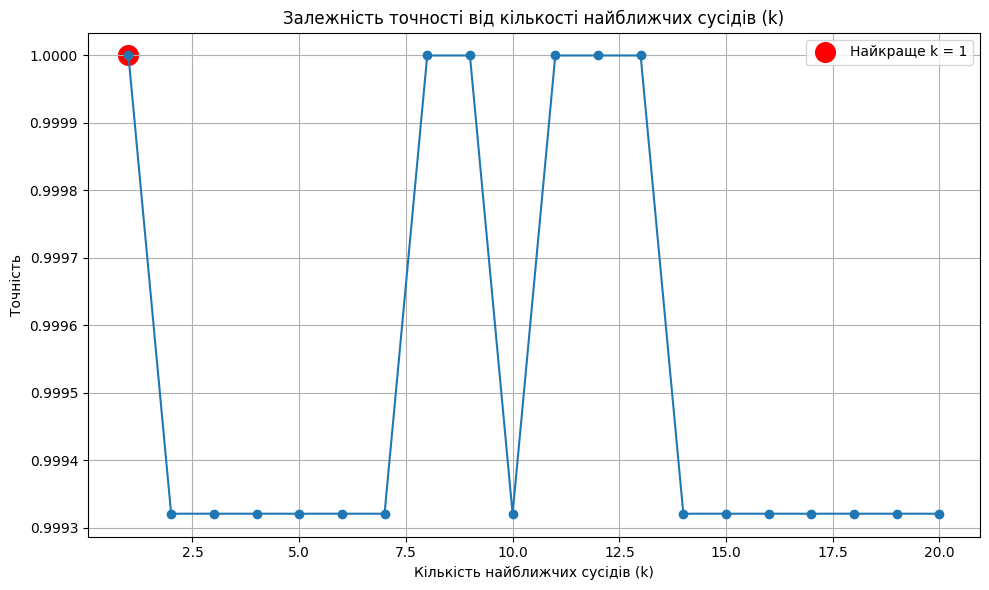

In [17]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Залежність точності від кількості найближчих сусідів (k)')
plt.xlabel('Кількість найближчих сусідів (k)')
plt.ylabel('Точність')
plt.grid(True)

best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
plt.scatter([best_k], [best_accuracy], color='red', s=200, label=f'Найкраще k = {best_k}')

plt.legend()
plt.tight_layout()
plt.show()

Зробимо кросс-валідацію на 3 блоках

In [ ]:
scores = cross_val_score(knn, X, Y, cv=3, scoring='accuracy')
print(f"Середня точність на кросс-валідації = {scores.mean()}, розкид = {scores.std()}")

Середня точність на кросс-валідації = 0.999185128539843, розкид = 0.0007623921649886272


Отже, ми з'ясували, що наша модель успішно класифікує дані з точністю, яка відповідає заданим критеріям :-)